In [2]:
import numpy as np
import pandas as pd

In [6]:
import os
os.listdir()

['.ipynb_checkpoints', '__notebook_source__.ipynb']

In [10]:
rd = pd.read_csv("../input/cs178-wine-quality/winequality-red.csv",sep = ';')
rd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Analysing Data and Finding Relations

In [12]:
rd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
rd.isna().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

###### Dataset is Clean as no nan values present

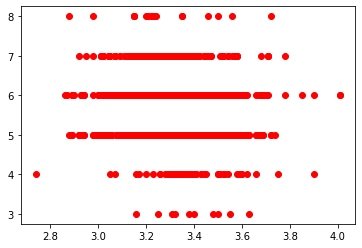

In [18]:
import matplotlib.pyplot as plt
plt.plot(rd['pH'],rd['quality'],'ro')
plt.show()

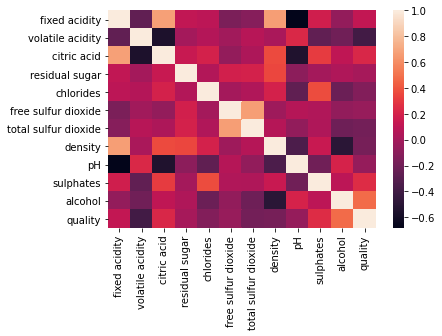

In [23]:
import seaborn as sb
sb.heatmap(rd.corr())
#rd.corr().plot()

###### As all values are numeric and seems to have correlated to quality of the wine we move to building model and ML part

In [25]:
y = rd.quality #Ouput -> To be Predicted 
X = rd.drop('quality', axis=1) #Input -> To Feed the Model

In [28]:
# Data Spilting into Testing and Training Data
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(X,y ,test_size=0.15, random_state=123)

In [31]:
# Data Preprocessing using Z-Score and Pipelining
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
pipeline = make_pipeline(StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

In [32]:
# 6. Declare hyperparameters -> Random Foerst Regressor
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [33]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                            

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
# 9. Evaluate model pipeline on test data
modelOP = clf.predict(xtest)
r2 = r2_score(ytest, modelOP)
mse = mean_squared_error(ytest, modelOP)
print(f"r2 score is {r2} \nMean Squared Error is {mse}")

r2 score is 0.5140993614027491 
Mean Squared Error is 0.3117525


In [41]:
import joblib as jb
jb.dump(clf, 'wine-rf-model.pkl')

['wine-rf-model.pkl']